## 基本ライブラリのインポート

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## データのインポートと前処理

ここでは、Boston近郊の住宅地データについて、目的変数(どれだけ住みやすいかのスコア?)の予測を行う。

In [5]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]
raw_df
# raw_df.iat[1,1]

,0,1,2,3,4,5,6,7,8,9,10
0,0.00632,18.00,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3
1,396.90000,4.98,24.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.02731,0.00,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8
3,396.90000,9.14,21.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.02729,0.00,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8
...,...,...,...,...,...,...,...,...,...,...,...
1007,396.90000,5.64,23.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1008,0.10959,0.00,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0
1009,393.45000,6.48,22.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1010,0.04741,0.00,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0


本来なら1行の中に入るはずが折り返されてしまっているデータが存在するので、それらを11,12,13列目に格納する。

In [6]:
#新たなrawを作る
raw_df[11] = 0
raw_df[12] = 0
raw_df[13] = 0
for j in range(3):
  for i in range(1011):
    raw_df.iat[i, 11+j] = raw_df.iat[i+1, j]
raw_df2 = raw_df.dropna()
df = raw_df2.rename(columns = {0:'CRIM',1:'ZN',2:'INDUS',3:'CHAS',4:'NOX',5:'RM',6:'AGE',7:'DIS',8:'RAD',9:'TAX',10:'PTRATIO',11:'B',12:'LSTAT',13:'Target'}, index=lambda s: int(s/2))
t = df['Target'].values
x = df.drop(labels=['Target'], axis=1).values
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# 30％をテストデータに分割
x_train, x_test, t_train, t_test = train_test_split(x, t, test_size=0.3, random_state=317)
# 標準化してみた
sc = StandardScaler()
sc.fit(x_train)
x_train_std = sc.transform(x_train)
x_test_std = sc.transform(x_test)

## 代表的なモデルの実装と評価

### 1. 各モデルの実装

理論で紹介した4つのモデルの実装を行う。

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

model = LinearRegression()
ridge = Ridge(alpha=1)
lasso = Lasso(alpha=1)
Elastic = ElasticNet(alpha=1, l1_ratio=0.5)
model.fit(x_train, t_train)
ridge.fit(x_train, t_train)
lasso.fit(x_train, t_train)
Elastic.fit(x_train, t_train)

ElasticNet(alpha=1)

予測値の算出

In [9]:
y_model_train = model.predict(x_train)
y_model_test = model.predict(x_test)
y_ridge_train = ridge.predict(x_train)
y_ridge_test = ridge.predict(x_test)
y_lasso_train = lasso.predict(x_train)
y_lasso_test = lasso.predict(x_test)
y_Elastic_train = Elastic.predict(x_train)
y_Elastic_test = Elastic.predict(x_test)

### 2. 重みの比較

Text(0.5, 1.0, 'Elastic Net')

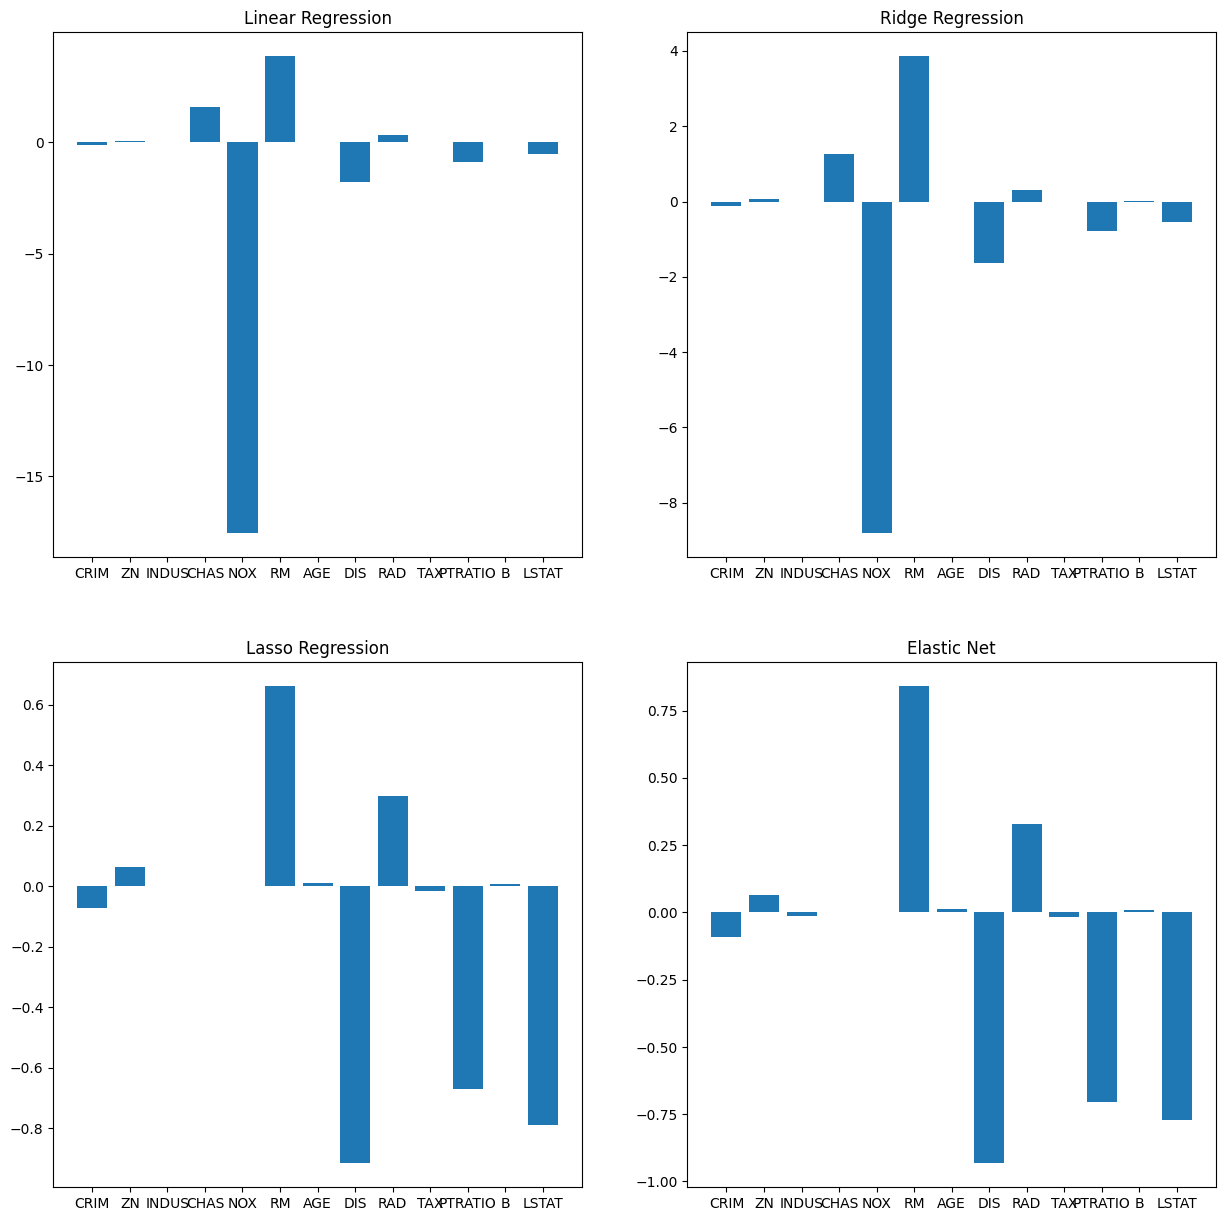

In [10]:
fig = plt.figure(figsize=(15,15))
left = np.array(['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT'])

# 重回帰分析
ax1 = fig.add_subplot(2, 2, 1)
ax1.bar(x=left, height=model.coef_)
ax1.set_title('Linear Regression')

# Ridge回帰
ax2 = fig.add_subplot(2, 2, 2)
ax2.bar(x=left, height=ridge.coef_)
ax2.set_title('Ridge Regression')

# lasso回帰
ax3 = fig.add_subplot(2, 2, 3)
ax3.bar(x=left, height=lasso.coef_)
ax3.set_title('Lasso Regression')

# ElasticNet
ax4 = fig.add_subplot(2, 2, 4)
ax4.bar(x=left, height=Elastic.coef_)
ax4.set_title('Elastic Net')

In [11]:
print(model.intercept_)
print(ridge.intercept_)
print(lasso.intercept_)
print(Elastic.intercept_)

37.30390457971381
31.683096800748043
44.14068577130558
43.58379968926654


In [12]:
print('train score : ', lasso.score(x_train, t_train))
print('test score : ', lasso.score(x_test, t_test))
y3 = lasso.predict(x_test)
print('予測値:', y3[0])
print('目標値' ,t_test[0])

train score :  0.6857482606732355
test score :  0.6653672226004339
予測値: 22.746165075953055
目標値 19.9


決定係数の値が全体的に小さくなったのでLasso回帰はよくなさそう。

### 3. 各モデルの評価

#### 決定係数 $R^2$

In [13]:
from sklearn.metrics import r2_score 

model_train_r2 = r2_score(t_train, y_model_train)
model_test_r2 = r2_score(t_test, y_model_test)
ridge_train_r2 = r2_score(t_train, y_ridge_train)
ridge_test_r2 = r2_score(t_test, y_ridge_test)
lasso_train_r2 = r2_score(t_train, y_lasso_train)
lasso_test_r2 = r2_score(t_test, y_lasso_test)
Elastic_train_r2 = r2_score(t_train, y_Elastic_train)
Elastic_test_r2 = r2_score(t_test, y_Elastic_test)

df_r2 = pd.DataFrame(
    data=np.array([[model_train_r2, model_test_r2],
                   [ridge_train_r2, ridge_test_r2],
                   [lasso_train_r2, lasso_test_r2],
                   [Elastic_train_r2, Elastic_test_r2]]),
    index=['LinearRegression','Ridge','Lasso','Elastic Net'],
    columns=['train','test']
)

df_r2

,train,test
LinearRegression,0.742429,0.723876
Ridge,0.739786,0.719819
Lasso,0.685748,0.665367
Elastic Net,0.691914,0.671340


#### k-Fold Cross Varidation

In [14]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
cv = KFold(n_splits=506,shuffle=False)
model_k = LinearRegression()
ridge_k = Ridge(alpha=1)
lasso_k = Lasso(alpha=1)
Elastic_k = ElasticNet(alpha=1, l1_ratio=0.5)
mse_model_train_list = []
mse_ridge_train_list = []
mse_lasso_train_list = []
mse_Elastic_train_list = []
mse_model_test_list = []
mse_ridge_test_list = []
mse_lasso_test_list = []
mse_Elastic_test_list = []
mae_model_train_list = []
mae_ridge_train_list = []
mae_lasso_train_list = []
mae_Elastic_train_list = []
mae_model_test_list = []
mae_ridge_test_list = []
mae_lasso_test_list = []
mae_Elastic_test_list = []

for train_index, test_index in cv.split(x):
    x_train, x_test = x[train_index], x[test_index]
    t_train, t_test = t[train_index], t[test_index]
    
    model_k.fit(x_train, t_train)
    ridge_k.fit(x_train, t_train)
    lasso_k.fit(x_train, t_train)
    Elastic_k.fit(x_train, t_train)
    
    y_model_train_k = model_k.predict(x_train)
    y_model_test_k = model_k.predict(x_test)
    y_ridge_train_k = ridge_k.predict(x_train)
    y_ridge_test_k = ridge_k.predict(x_test)
    y_lasso_train_k = lasso_k.predict(x_train)
    y_lasso_test_k = lasso_k.predict(x_test)
    y_Elastic_train_k = Elastic_k.predict(x_train)
    y_Elastic_test_k = Elastic_k.predict(x_test)
    
    # 平均平方二乗誤差での評価
    mse_model_train = mean_squared_error(y_model_train_k, t_train)
    mse_ridge_train = mean_squared_error(y_ridge_train_k, t_train)
    mse_lasso_train = mean_squared_error(y_lasso_train_k, t_train)
    mse_Elastic_train = mean_squared_error(y_Elastic_train_k, t_train)
    mse_model_test = mean_squared_error(y_model_test_k, t_test)
    mse_ridge_test = mean_squared_error(y_ridge_test_k, t_test)
    mse_lasso_test = mean_squared_error(y_lasso_test_k, t_test)
    mse_Elastic_test = mean_squared_error(y_Elastic_test_k, t_test)
    
    mse_model_train_list.append(mse_model_train)
    mse_ridge_train_list.append(mse_ridge_train)
    mse_lasso_train_list.append(mse_lasso_train)
    mse_Elastic_train_list.append(mse_Elastic_train)
    mse_model_test_list.append(mse_model_test)
    mse_ridge_test_list.append(mse_ridge_test)
    mse_lasso_test_list.append(mse_lasso_test)
    mse_Elastic_test_list.append(mse_Elastic_test)
    
    # 平均絶対誤差での評価
    model_train_MAE = mean_absolute_error(t_train, y_model_train_k)
    model_test_MAE = mean_absolute_error(t_test, y_model_test_k)
    ridge_train_MAE = mean_absolute_error(t_train, y_ridge_train_k)
    ridge_test_MAE = mean_absolute_error(t_test, y_ridge_test_k)
    lasso_train_MAE = mean_absolute_error(t_train, y_lasso_train_k)
    lasso_test_MAE = mean_absolute_error(t_test, y_lasso_test_k)
    Elastic_train_MAE = mean_absolute_error(t_train, y_Elastic_train_k)
    Elastic_test_MAE = mean_absolute_error(t_test, y_Elastic_test_k)
    
    mae_model_train_list.append(model_train_MAE)
    mae_ridge_train_list.append(ridge_train_MAE)
    mae_lasso_train_list.append(lasso_train_MAE)
    mae_Elastic_train_list.append(Elastic_train_MAE)
    mae_model_test_list.append(model_test_MAE)
    mae_ridge_test_list.append(ridge_test_MAE)
    mae_lasso_test_list.append(lasso_test_MAE)
    mae_Elastic_test_list.append(Elastic_test_MAE)

##### 平均平方二乗誤差

In [15]:
model_train_RMSE = np.sqrt(np.mean(mse_model_train_list))
model_test_RMSE = np.sqrt(np.mean(mse_model_test_list))
ridge_train_RMSE = np.sqrt(np.mean(mse_ridge_train_list))
ridge_test_RMSE = np.sqrt(np.mean(mse_ridge_test_list))
lasso_train_RMSE = np.sqrt(np.mean(mse_lasso_train_list))
lasso_test_RMSE = np.sqrt(np.mean(mse_lasso_test_list))
Elastic_train_RMSE = np.sqrt(np.mean(mse_Elastic_train_list))
Elastic_test_RMSE = np.sqrt(np.mean(mse_Elastic_test_list))

df_RMSE = pd.DataFrame(
    data=np.array([[model_train_RMSE, model_test_RMSE],
                    [ridge_train_RMSE, ridge_test_RMSE],
                    [lasso_train_RMSE, lasso_test_RMSE],
                    [Elastic_train_RMSE, Elastic_test_RMSE]]),
    index=['LinearRegression','Ridge','Lasso','Elastic Net'],
    columns=['train','test']
)

df_RMSE

,train,test
LinearRegression,4.679003,4.870908
Ridge,4.695004,4.884960
Lasso,5.176373,5.330034
Elastic Net,5.147602,5.281037


##### 平均絶対誤差（MAE）

In [16]:
model_train_MEA = np.mean(mae_model_train_list)
model_test_MEA = np.mean(mae_model_test_list)
ridge_train_MEA = np.mean(mae_ridge_train_list)
ridge_test_MEA = np.mean(mae_ridge_test_list)
lasso_train_MEA = np.mean(mae_lasso_train_list)
lasso_test_MEA = np.mean(mae_lasso_test_list)
Elastic_train_MEA = np.mean(mae_Elastic_train_list)
Elastic_test_MEA = np.mean(mae_Elastic_test_list)

df_MAE = pd.DataFrame(
    data=np.array([[model_train_MAE, model_test_MAE],
                    [ridge_train_MAE, ridge_test_MAE],
                    [lasso_train_MAE, lasso_test_MAE],
                    [Elastic_train_MAE, Elastic_test_MAE]]),
    index=['LinearRegression','Ridge','Lasso','Elastic Net'],
    columns=['train','test']
)

df_MAE

,train,test
LinearRegression,3.259831,10.662890
Ridge,3.254956,10.999844
Lasso,3.606943,13.349727
Elastic Net,3.586971,13.211982


## 相関関係と多重共線性問題

In [17]:
file_path = '/Users/takajikazuya/Documents/machine_learning/Regression/regression_pls.csv'
df = pd.read_csv(file_path)
df

,Target,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x187,x188,x189,x190,x191,x192,x193,x194,x195,x196
0,1.58,59.068,54.028,59.037114,24,0,0.213790,-0.369921,0.369921,0.213790,...,0,0,0,0,0,0,0,0,0,0
1,1.34,46.073,40.025,46.053098,20,0,-0.001725,-0.271722,0.271722,0.001725,...,0,0,0,0,0,0,0,0,0,0
2,1.22,60.052,56.020,60.021129,24,0,0.299685,-0.481433,0.481433,0.299685,...,0,0,0,0,0,0,0,0,0,0
3,1.15,71.123,62.051,71.073499,30,0,-0.004845,-0.316731,0.316731,0.004845,...,0,0,0,0,0,0,0,0,0,0
4,1.12,76.055,72.023,76.027277,30,0,0.335391,-0.349891,0.349891,0.335391,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1285,-8.65,360.882,356.850,357.844416,94,0,0.068622,-0.083604,0.083604,0.068622,...,0,0,0,0,0,0,0,0,0,0
1286,-8.66,278.354,264.242,278.109550,102,0,-0.009902,-0.061629,0.061629,0.009902,...,0,0,0,0,0,0,0,0,0,0
1287,-9.03,276.338,264.242,276.093900,100,0,-0.001409,-0.061011,0.061011,0.001409,...,0,0,0,0,0,0,0,0,0,0
1288,-10.26,464.217,463.209,459.727499,112,0,0.080892,-0.082630,0.082630,0.080892,...,0,0,0,0,0,0,0,0,0,0


In [18]:
x = df.drop('Target', axis=1).values
t = df['Target'].values

print(x.shape,t.shape)

(1290, 196) (1290,)


In [19]:
x_train, x_test, t_train, t_test = train_test_split(x, t, test_size=0.3, random_state=0)
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [20]:
model.fit(x_train, t_train)

LinearRegression()

In [21]:
print('train : ', model.score(x_train, t_train))
print('test : ', model.score(x_test, t_test))

train :  0.9365473143146129
test :  0.004243104694099609


訓練データとテストデータでスコアに大きな乖離がある事がわかる。
入力変数同士に相関があることが原因であると予想し、相関をチェックする。

In [22]:
df_corr = df.corr()
df_corr.head()

,Target,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x187,x188,x189,x190,x191,x192,x193,x194,x195,x196
Target,1.000000,-0.642326,-0.648078,-0.640489,-0.524453,NaN,0.111829,-0.360696,0.357026,0.113189,...,-0.032287,-0.015204,0.019244,-0.047169,NaN,0.007788,NaN,0.002448,-0.113820,0.043600
x1,-0.642326,1.000000,0.997571,0.999978,0.908895,NaN,0.322508,-0.117193,0.134074,0.298204,...,0.051291,0.186110,0.027947,-0.002219,NaN,0.001304,NaN,-0.015226,-0.038657,0.027857
x2,-0.648078,0.997571,1.000000,0.997252,0.883891,NaN,0.322631,-0.097297,0.115794,0.294947,...,0.047416,0.191792,0.029659,-0.007914,NaN,0.005912,NaN,-0.015106,-0.062823,0.027773
x3,-0.640489,0.999978,0.997252,1.000000,0.910855,NaN,0.324352,-0.120477,0.137237,0.300415,...,0.051542,0.186772,0.028046,-0.002001,NaN,0.001447,NaN,-0.015093,-0.038138,0.028359
x4,-0.524453,0.908895,0.883891,0.910855,1.000000,NaN,0.385792,-0.284647,0.293981,0.382603,...,0.044125,0.174983,0.022996,0.018780,NaN,-0.010834,NaN,-0.016378,0.027813,0.055553


今回はこれをヒートマップで表現してみる。

<Axes: >

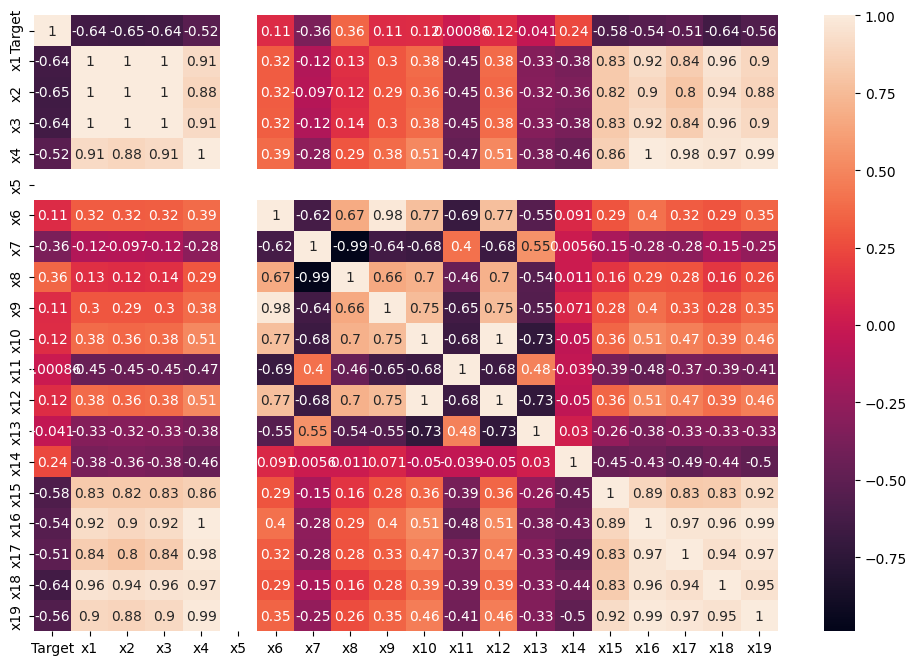

In [23]:
plt.figure(figsize=(12,8))
sns.heatmap(df_corr.iloc[:20,:20], annot=True)

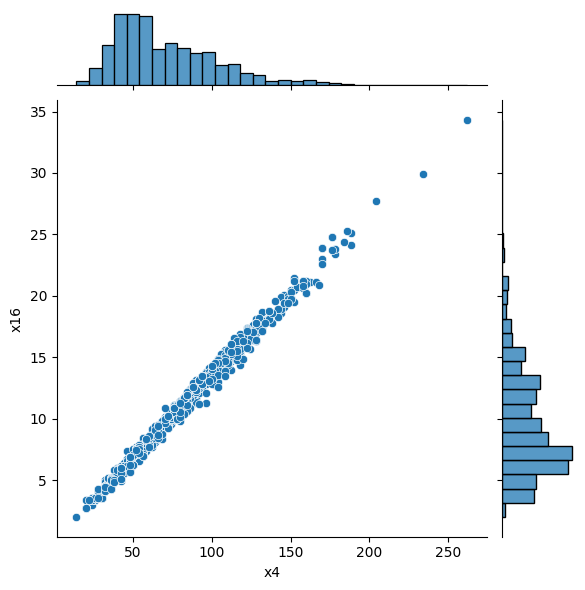

In [24]:
sns.jointplot(x='x4', y='x16', data=df)

めちゃくちゃ強い相関を発見したので、今回はPLSを用いてこの多重共線性問題を解決する。

In [25]:
from sklearn.cross_decomposition import PLSRegression
pls = PLSRegression(n_components=4)

In [26]:
pls.fit(x_train, t_train)

PLSRegression(n_components=4)

In [27]:
print('train score : ', pls.score(x_train, t_train))
print('test score : ', pls.score(x_test, t_test))

train score :  0.891992251992544
test score :  0.8565944333973625


そこそこ解消できたと思われる。